<a href="https://colab.research.google.com/github/yazhinil/FMML20230017/blob/main/Module%2009%20Lab%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# # The following code is used for hiding the warnings and make this notebook clearer.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
## Code to plot decision boundary ##

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [3]:
torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,0], dtype=torch.float, requires_grad=False)


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

In [10]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(-1, +1)

weights_init(model)


In [11]:
# Use a mean square error loss
loss_func = nn.MSELoss()

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [13]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.17487791180610657, 
Epoch: 500, Loss: 0.1194857582449913, 
Epoch: 1000, Loss: 0.3298743665218353, 
Epoch: 1500, Loss: 0.2268778681755066, 
Epoch: 2000, Loss: 0.23896799981594086, 
Epoch: 2500, Loss: 0.2257288545370102, 
Epoch: 3000, Loss: 0.002675645286217332, 
Epoch: 3500, Loss: 0.2644127607345581, 
Epoch: 4000, Loss: 0.0031735755037516356, 
Epoch: 4500, Loss: 0.2723679840564728, 


In [9]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [0.]
tensor([1., 1.]) [0.]


<ipython-input-2-d74ee9bebb86>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


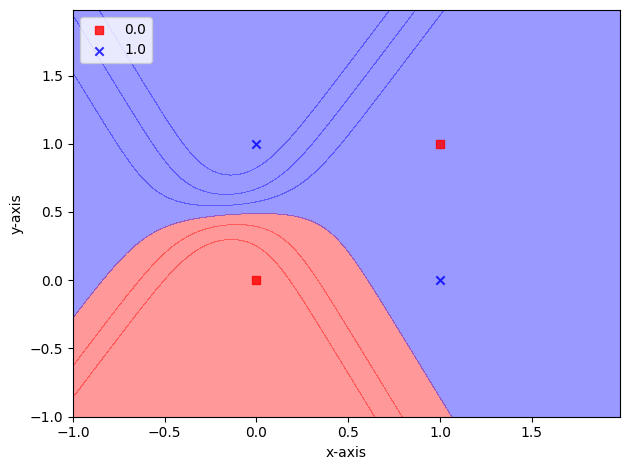

In [14]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Exercises

1.Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.

2.Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?

Ans- The basic linear decision-making mechanism of Single Layer Perceptrons is not altered; instead, modifications to the thresholding function and weight scaling are required to account for the wider range. Because their non-linear activation functions can often manage a variety of input/output ranges, Multi-Layer Perceptrons are more versatile.

3.Try removing the activation function from the MLP and rerun the code. What happens in this case?
  - Can you tell why particular activation function can be used in the model architecture?

Ans- When an MLP's activation function is eliminated, it becomes a linear model and is less able to identify intricate patterns in the data. The network may learn complex relationships thanks to the non-linearity introduced by activation functions.
Sigmoid is suitable for binary classification, tanh for outputs ranging from -1 to 1, ReLU for alleviating the vanishing gradient problem, and softmax for multi-class classification

